# Chemical Kinetics Case Study

## Source of the problem

This is exercise 9.9 from David M. Himmelblau, Process Analysis by Statistical Methods, Wiley, 1970

## Defining the problem
We model the reactions

$$ A + B  -> C + F (k_1)$$
$$ A + C -> D + F (k_2)$$
$$ A + D -> E + F (k_3)$$

The derivatives can be written as
$$ \frac{dA}{dt} =  -k_1 AB - k_2 AC - k_3 AD$$
$$ \frac{dB}{dt} =  -k_1 AB $$
$$ \frac{dC}{dt} =  k_1 AB - k_2 AC $$
$$ \frac{dD}{dt} =   k_2 AC - k_3 AD$$
$$ \frac{dE}{dt} =   k_3 AD$$


This is an example, where not all the variables are observed. A is observed, rest in latent, initial conditions of the variables are known.

Here is the example of the dataset given in the paper, directly copied here for the ease of use.

In [1]:
### Dataset
data = { "Time": [
        0, 4.50, 8.67, 12.67, 17.75, 22.67, 27.08, 32.00, 36.00,
        46.33, 57.00, 69.00, 76.75, 90.00, 102.00, 108.00, 147.92,
        198.00, 241.75, 270.25, 326.25, 418.00, 501.00
    ],
    "A_concentration": [
        0.02090, 0.01540, 0.01422, 0.01335, 0.01232, 0.01181,
        0.01139, 0.01092, 0.01054, 0.00978, 0.009157, 0.008594,
        0.008395, 0.007891, 0.007510, 0.007370, 0.006646,
        0.005883, 0.005322, 0.004960, 0.004518, 0.004075, 0.003715
    ]
}

Next we defined the ODE equations, keeping everying same as given in the paper.

In [2]:
def reaction_system(y, t, k1, k2, k3):
    A, B, C, D, E = y

    dA_dt = -k1 * A * B - k2 * A * C - k3 * A * D
    dB_dt = -k1 * A * B
    dC_dt =  k1 * A * B - k2 * A * C
    dD_dt =  k2 * A * C - k3 * A * D
    dE_dt =  k3 * A * D

    return [dA_dt, dB_dt, dC_dt, dD_dt, dE_dt]

Next we need to define a function that simulates the ODE. In this example we can only use to focus on $A$ as rest of the variables are latent.

In [3]:
time = data["Time"]
A_data = data["A_concentration"]


def simulate_model(params, only_A = True):
    y0 = [A_data[0], A_data[0]/3, 0, 0, 0]
    k1 = params['k1']
    k2 = params['k2']
    k3 = params['k3']
    sol = odeint(reaction_system, y0, time, args=(k1, k2, k3))
    A_conc = sol[:, 0]
    if only_A is False:
        return sol
    else:
        return A_conc

Next, we define an error function, this error function, depends on the data and the model predicted outcomes. The optimizer minimizes this error function

In [4]:


def mse(y_pred):
    return np.mean((np.array(y_pred) - np.array(A_data))**2)

Next is the fun part, we import the package we developed.

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import sys
import scipy.io
from concurrent.futures import ProcessPoolExecutor

# Get path 
# Get path to MCMCwithODEs_primer (3 levels up)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

import sys
sys.path.append('./..')  # or absolute path if needed

from invode import ODEOptimizer, lhs_sample

## Fitting data

We just provide the bounds for different parameters. We use the same bounds as given by the authors.

In [6]:


param_bounds={
            'k1': (0, 20),
            'k2': (0, 20),
            'k3': (0, 20)
        }


optimizer = ODEOptimizer(
    ode_func=simulate_model,
    error_func=mse,
    param_bounds=param_bounds,
    seed=42,
    num_top_candidates=2,
    n_samples=300,
    num_iter=10,
    verbose=True,
    verbose_plot=True
)


Fitting Progress:  20%|██████████                                        | 2/10 [00:00<00:00, 10.98it/s]


Iteration 1/10
Best error so far: 0.0000
Best params: {'k1': 5.289120657707072, 'k2': 5.72739937315741, 'k3': 5.959001452290009}

Iteration 2/10
Best error so far: 0.0000
Best params: {'k1': 9.924091562481056, 'k2': 0.6492881284236868, 'k3': 8.95344358115479}

Iteration 3/10
Best error so far: 0.0000
Best params: {'k1': 12.82627054908282, 'k2': 1.293571261493535, 'k3': 0.5914112435919845}

Iteration 4/10


Fitting Progress:  50%|█████████████████████████                         | 5/10 [00:00<00:00,  8.53it/s]

Best error so far: 0.0000
Best params: {'k1': 8.83830415580514, 'k2': 1.6803115326769793, 'k3': 0.2785331098341115}

Iteration 5/10
Best error so far: 0.0000
Best params: {'k1': 8.83830415580514, 'k2': 1.6803115326769793, 'k3': 0.2785331098341115}

Iteration 6/10
Best error so far: 0.0000
Best params: {'k1': 14.679856013603871, 'k2': 1.5199170990216502, 'k3': 0.2846373541943114}


Fitting Progress:  80%|████████████████████████████████████████          | 8/10 [00:00<00:00,  7.77it/s]


Iteration 7/10
Best error so far: 0.0000
Best params: {'k1': 14.679856013603871, 'k2': 1.5199170990216502, 'k3': 0.2846373541943114}

Iteration 8/10
Best error so far: 0.0000
Best params: {'k1': 14.679856013603871, 'k2': 1.5199170990216502, 'k3': 0.2846373541943114}


Fitting Progress: 100%|█████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.34it/s]


Iteration 9/10
Best error so far: 0.0000
Best params: {'k1': 14.679856013603871, 'k2': 1.5199170990216502, 'k3': 0.2846373541943114}

Iteration 10/10
Best error so far: 0.0000
Best params: {'k1': 14.679856013603871, 'k2': 1.5199170990216502, 'k3': 0.2846373541943114}


Fitting Progress: 100%|█████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.96it/s]


Refining params: {'k1': 13.945766585619872, 'k2': 1.7777418108746956, 'k3': 0.23961818951773084}

[Local Optimization]
Refined parameters: {'k1': 13.945766585619872, 'k2': 1.7777418108746956, 'k3': 0.23961818951773084}
Refined error: 4.7772137977054304e-08
Refining params: {'k1': 13.856620509103827, 'k2': 1.261295188575149, 'k3': 0.401410748216157}

[Local Optimization]
Refined parameters: {'k1': 13.856620509103827, 'k2': 1.261295188575149, 'k3': 0.401410748216157}
Refined error: 1.0760432546540788e-07
After local refinement:
Best params: {'k1': 13.945766585619872, 'k2': 1.7777418108746956, 'k3': 0.23961818951773084}
Best error: 0.0000


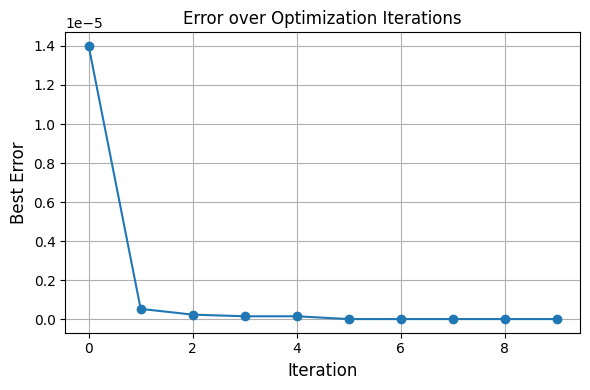

({'k1': 13.945766585619872,
  'k2': 1.7777418108746956,
  'k3': 0.23961818951773084},
 4.7772137977054304e-08)

In [7]:
optimizer.fit()


In [8]:
best_params = optimizer.best_params

solution_all_variables = simulate_model(best_params, only_A=False)

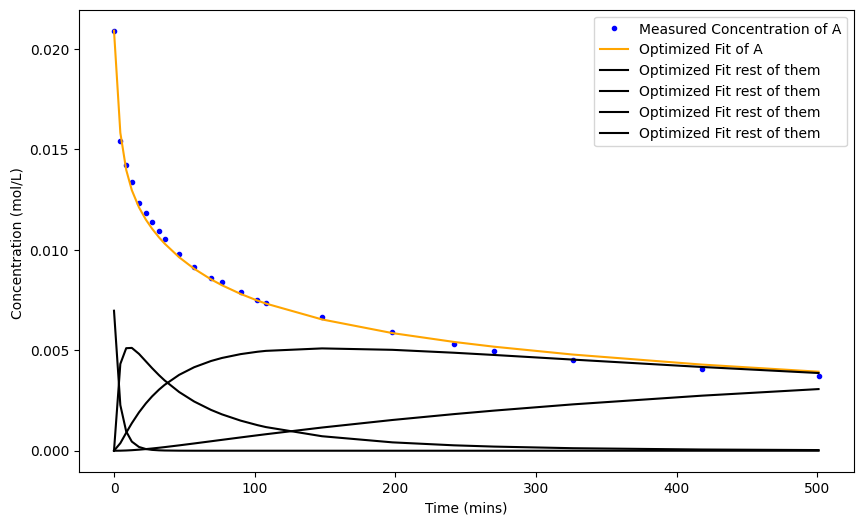

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(time, A_data, label='Measured Concentration of A', color='blue', marker='o', markersize=3, linestyle='none')
plt.plot(time,solution_all_variables[:,0], label='Optimized Fit of A', color='orange')
plt.plot(time,solution_all_variables[:,1:], label='Optimized Fit rest of them', color='black')
plt.xlabel('Time (mins)')
plt.ylabel('Concentration (mol/L) ')
plt.legend()
plt.show()

We can always look into what our optimizer did in the first place.

In [10]:
optimizer.summary()

🔍 ODEOptimizer Summary:
  ode_func: simulate_model
  error_func: mse
  param_bounds: {'k1': (0, 20), 'k2': (0, 20), 'k3': (0, 20)}
  initial_guess: {'k1': 10.0, 'k2': 10.0, 'k3': 10.0}
  n_samples: 300
  num_iter: 10
  num_top_candidates: 2
  do_local_opt: True
  local_method: L-BFGS-B
  shrink_rate: 0.5
  parallel: False
  local_parallel: False
  verbose: True
  verbose_plot: True
  seed: 42
  best_error: 4.7772137977054304e-08
  best_params: {'k1': 13.945766585619872, 'k2': 1.7777418108746956, 'k3': 0.23961818951773084}


Thus InvODE can be a lightweight, yet effective tool for fitting pointwise parameters to datasets.